# Tugas Pratikum

## Tugas K-Means

> Buatlah sebuah model K-Means dengan ketentuan,

1. Gunakan data 'Mall_Customers.csv'
2. Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)
3. Buatlah model K-Means dengan mempertimbangkan jumlah
k
k yang terbaik.


### 1. PREPARATION

> Gunakan data 'Mall_Customers.csv'

In [8]:
!wget -O Mall_Customers.csv https://3041032130-files.gitbook.io/~/files/v0/b/gitbook-x-prod.appspot.com/o/spaces%2F5CvtE8Xh9b75jKUaRr5Y%2Fuploads%2FVIjSMZExLu0Qgychn8uw%2FMall_Customers.csv?alt=media&token=8cfe9d07-11b3-4939-a34d-1360e6ab2525

try:
  from google.colab import output
  output.clear()
except:
  pass

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [9]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### 2. List Features
> Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)

In [10]:
features = ['Annual Income (k$)', 'Spending Score (1-100)']
X = df[features]
display(X.head())

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


### 3. Model KMeans

> Buatlah model K-Means dengan mempertimbangkan jumlah
k
k yang terbaik.

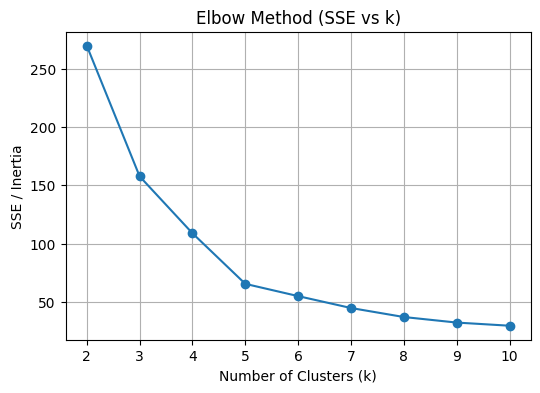

Silhouette per k:
k=2: SSE=269.7, Silhouette=0.321
k=3: SSE=157.7, Silhouette=0.467
k=4: SSE=108.9, Silhouette=0.494
k=5: SSE=65.6, Silhouette=0.555
k=6: SSE=55.1, Silhouette=0.540
k=7: SSE=44.9, Silhouette=0.528
k=8: SSE=37.1, Silhouette=0.457
k=9: SSE=32.4, Silhouette=0.457
k=10: SSE=29.7, Silhouette=0.436

Best k = 5, Silhouette = 0.555


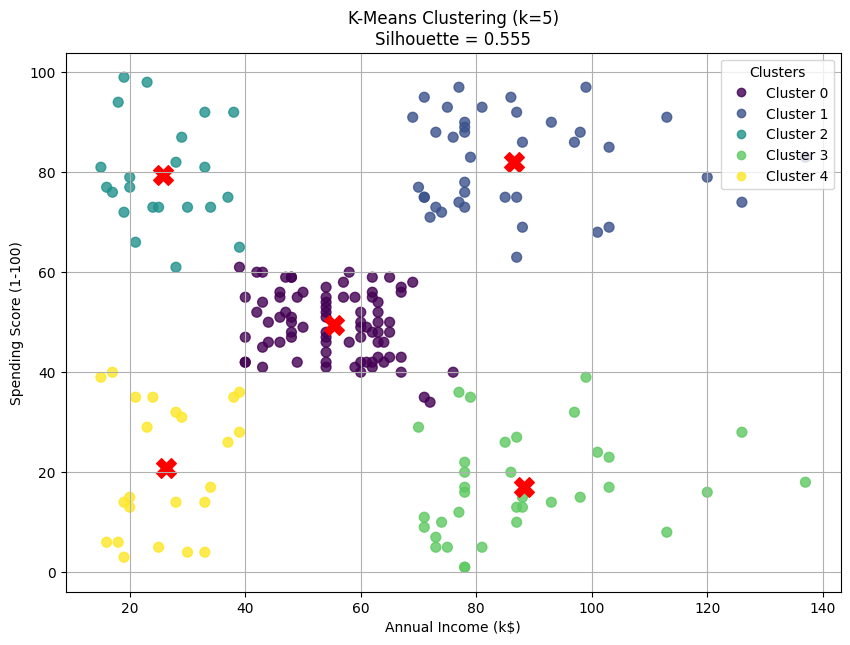

In [34]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Inisialisasi list untuk SSE (inertia) dan silhouette
inertias = []
sil_scores = []
k_range = range(2, 11)   # cek k = 2 s/d 10

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=20)
    labels = km.fit_predict(X_scaled)
    inertias.append(km.inertia_)  # SSE
    sil_scores.append(silhouette_score(X_scaled, labels))

# ----- Plot Elbow -----
plt.figure(figsize=(6,4))
plt.plot(k_range, inertias, marker='o')
plt.title('Elbow Method (SSE vs k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE / Inertia')
plt.grid(True)
plt.show()

# ----- Cari k dengan silhouette tertinggi -----
best_k, best_score = max(zip(k_range, sil_scores), key=lambda x: x[1])
print("Silhouette per k:")
for k, sse, sil in zip(k_range, inertias, sil_scores):
    print(f"k={k}: SSE={sse:.1f}, Silhouette={sil:.3f}")
print(f"\nBest k = {best_k}, Silhouette = {best_score:.3f}")

# ----- Clustering dengan k terbaik -----
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=20)
clusters = kmeans.fit_predict(X_scaled)
centers = scaler.inverse_transform(kmeans.cluster_centers_)

# ----- Visualisasi hasil clustering -----
plt.figure(figsize=(10, 7))
scatter = plt.scatter(
    X['Annual Income (k$)'],
    X['Spending Score (1-100)'],
    c=clusters, cmap='viridis', s=50, alpha=0.8
)
plt.scatter(
    centers[:, 0], centers[:, 1],
    c='red', s=200, marker='X', label='Cluster Centers'
)

plt.title(f'K-Means Clustering (k={best_k})\nSilhouette = {best_score:.3f}')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(
    handles=scatter.legend_elements()[0],
    labels=[f'Cluster {i}' for i in range(best_k)],
    title="Clusters",
    loc="upper right"
)
plt.grid(True)
plt.show()


## Tugas DBSCAN


1. Buat dataset make_moons (1000 sampel, noise=0.05), lalu normalisasi.
2. Jalankan DBSCAN dengan eps=0.2, min_samples=5, hitung jumlah klaster & noise.
3. Evaluasi dengan metrik: Homogeneity, Completeness, V-measure, ARI, AMI, Silhouette.
4. Visualisasikan hasil DBSCAN (core sample = titik besar, non-core = titik kecil, noise = hitam).
5. Lakukan eksperimen:
* eps = 0.05, 0.1, 0.3, 0.5
* min_samples = 3, 10, 20
* Catat perubahan klaster, noise, dan kualitas evaluasi.

### Dataset & Normalisasi

> Buat dataset make_moons (1000 sampel, noise=0.05), lalu normalisasi.

In [40]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import (homogeneity_score, completeness_score, v_measure_score,
                             adjusted_rand_score, adjusted_mutual_info_score, silhouette_score)

In [41]:

X, y_true = make_moons(n_samples=1000, noise=0.05, random_state=42)
X = StandardScaler().fit_transform(X)

### DBSCAN dasar

> 2. Jalankan DBSCAN dengan eps=0.2, min_samples=5, hitung jumlah klaster & noise.

In [52]:

db = DBSCAN(eps=0.2, min_samples=5).fit(X)
labels = db.labels_
core_mask = np.zeros_like(labels, dtype=bool)
core_mask[db.core_sample_indices_] = True
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Jumlah klaster: {n_clusters}")
print(f"Jumlah noise: {n_noise}")

Jumlah klaster: 2
Jumlah noise: 0


### Evaluasi

In [53]:

metrics = {
    "Homogeneity": homogeneity_score(y_true, labels),
    "Completeness": completeness_score(y_true, labels),
    "V-measure": v_measure_score(y_true, labels),
    "ARI": adjusted_rand_score(y_true, labels),
    "AMI": adjusted_mutual_info_score(y_true, labels),
    "Silhouette": silhouette_score(X, labels) if n_clusters > 1 else np.nan
}
print("\nMetrik evaluasi (eps=0.2, min_samples=5)")
for k,v in metrics.items(): print(f"{k:12s}: {v:.3f}")


Metrik evaluasi (eps=0.2, min_samples=5)
Homogeneity : 1.000
Completeness: 1.000
V-measure   : 1.000
ARI         : 1.000
AMI         : 1.000
Silhouette  : 0.391


### Visualisasi

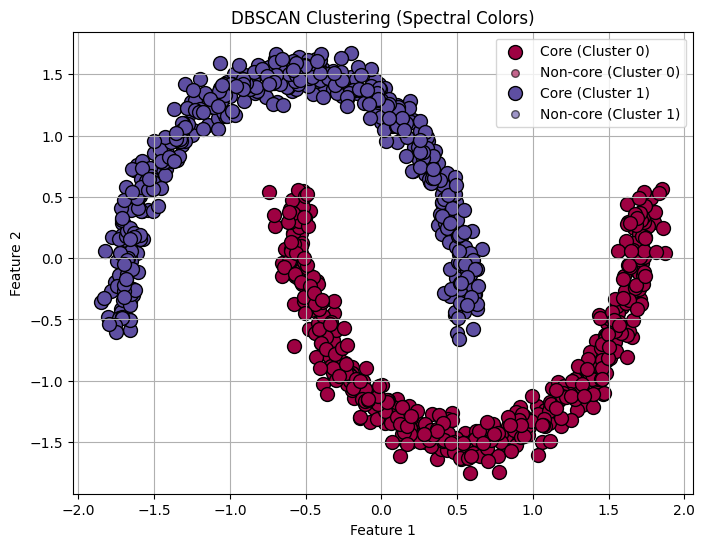

In [48]:

plt.figure(figsize=(8,6))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:  # noise = hitam
        col = [0, 0, 0, 1]
    mask = (labels == k)
    # core points
    xy = X[mask & core_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=[col], s=100, edgecolors='k',
                label=f'Core (Cluster {k})' if k != -1 else 'Noise')
    # non-core points
    xy = X[mask & ~core_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=[col], s=30, edgecolors='k', alpha=0.6,
                label=f'Non-core (Cluster {k})' if k != -1 else '')

# rapikan legend (hapus duplikat)
handles, lbls = plt.gca().get_legend_handles_labels()
plt.legend(dict(zip(lbls, handles)).values(),
           dict(zip(lbls, handles)).keys(),
           loc="upper right")
plt.title('DBSCAN Clustering (Spectral Colors)')
plt.xlabel("Feature 1"); plt.ylabel("Feature 2")
plt.grid(True); plt.show()

### Eksperimen parameter

In [50]:

results=[]
for eps in [0.05,0.1,0.3,0.5]:
    for ms in [3,10,20]:
        d=DBSCAN(eps=eps,min_samples=ms).fit(X)
        lbl=d.labels_
        nc=len(set(lbl))-(1 if -1 in lbl else 0)
        nn=list(lbl).count(-1)
        sil=silhouette_score(X,lbl) if nc>1 else np.nan
        results.append({
            "eps":eps,"min_samples":ms,"clusters":nc,"noise":nn,
            "Homogeneity":homogeneity_score(y_true,lbl),
            "Completeness":completeness_score(y_true,lbl),
            "V-measure":v_measure_score(y_true,lbl),
            "ARI":adjusted_rand_score(y_true,lbl),
            "AMI":adjusted_mutual_info_score(y_true,lbl),
            "Silhouette":sil
        })
print("\nRingkasan Eksperimen DBSCAN")
print(pd.DataFrame(results).round(3))


Ringkasan Eksperimen DBSCAN
     eps  min_samples  clusters  noise  Homogeneity  Completeness  V-measure  \
0   0.05            3        69    186        0.816         0.153      0.257   
1   0.05           10         3    970        0.031         0.127      0.049   
2   0.05           20         0   1000        0.000         1.000      0.000   
3   0.10            3         2     14        0.986         0.903      0.943   
4   0.10           10         7     57        0.943         0.410      0.571   
5   0.10           20         6    850        0.154         0.155      0.155   
6   0.30            3         2      0        1.000         1.000      1.000   
7   0.30           10         2      0        1.000         1.000      1.000   
8   0.30           20         2      0        1.000         1.000      1.000   
9   0.50            3         2      0        1.000         1.000      1.000   
10  0.50           10         2      0        1.000         1.000      1.000   
11  0.50   